In [1]:
# from IPython.display import display, HTML
# from IPython.display import display, HTML
# from ipywidgets import interact, widgets
# %matplotlib notebook

# %matplotlib ipympl
%matplotlib widget

import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py


# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)


print(os.getpid())
%cd ../../

import pylib.mix as mix

21268
C:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [75]:
# ---------------------------------------------------------------------------------------------------
# --- Solve d x / d t = - x**2 using KvN approach: direct simulation of the Schroedinger equation ---
# ---------------------------------------------------------------------------------------------------
nx, nt = 10, 12
Nx = 1<<nx
Nt = 1<<nt
x = np.linspace(-2,2,Nx)
t = np.linspace(0,4,Nt)
dx = np.diff(x)[0]
dt = np.diff(t)[0]

psi = np.zeros(Nx)

delta_gauss = 0.1
x_center = 1.0
coef_gauss = 1./(np.sqrt(2.*np.pi) * delta_gauss)
for ii in range(Nx):
    psi[ii] = np.exp(-(x[ii] - x_center)**2/(2.*delta_gauss**2))

# wavefunctino(time,space): 
psi_tx = np.zeros((Nt,Nx), dtype = float)
psi_tx[0,:] = np.array(psi)
psi_tx[0,0] = 0
psi_tx[0,Nx-1] = 0

In [76]:
# Solve the equation:

for it in range(Nt-1):
    for ix in range(1,Nx-1):
        x1 = x[ix]
        x2h = x1**2/dx
        psi_tx[it+1,ix] = psi_tx[it,ix] + dt * (x1*psi_tx[it,ix] + x2h * (psi_tx[it,ix+1] - psi_tx[it,ix]) ) # ix+1 is taken (upwinding)

psi_tx_transposed = np.transpose(psi_tx)

In [81]:
psi_tx_transposed = np.transpose(psi_tx)

In [13]:
psi_tx[0,:]

array([0.000e+000, 1.193e-195, 3.846e-195, ..., 4.203e-022, 2.849e-022,
       0.000e+000])

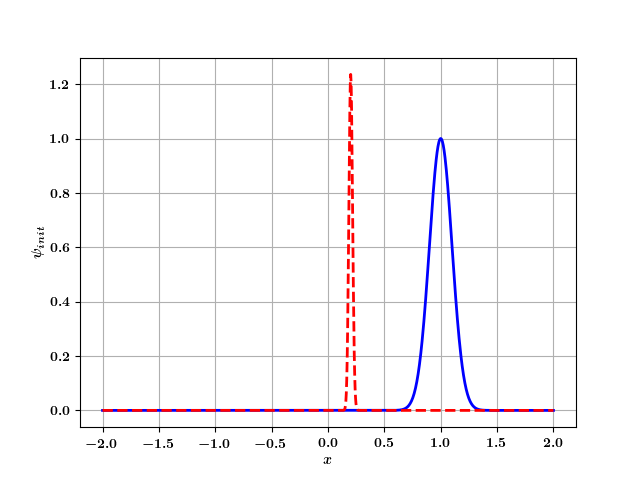

In [78]:
# ---------------------------------------------------------------------------------------------------
# --- Print psi(x) at different t ---
# ---------------------------------------------------------------------------------------------------
plt.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, psi_tx[0,:], color='b', linewidth = 2, linestyle='-')
ax.plot(x, psi_tx[-1,:], color='red', linewidth = 2, linestyle='--')
plt.xlabel('$x$')
plt.ylabel("$\psi_{init}$")
# ax.legend()
plt.grid(True)
plt.show()

(0.0, 1.5)

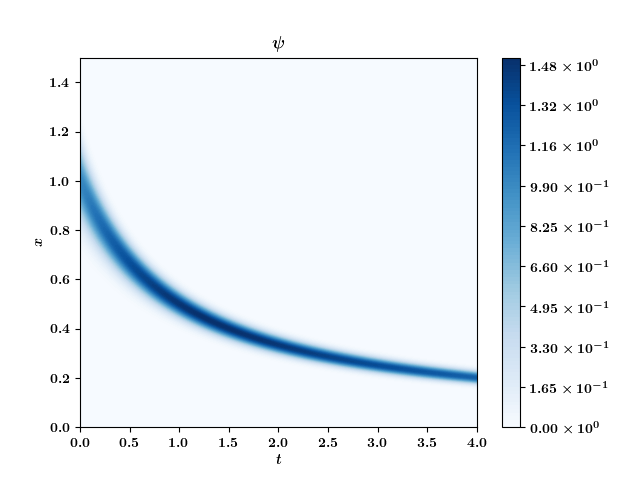

In [97]:
# ---------------------------------------------------------------------------------------------------
# --- Print psi(t,x) ---
# ---------------------------------------------------------------------------------------------------
from matplotlib import ticker

cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
# cmap_two_signs_= 'Greys'
# cmap_two_signs_= 'Pastel1'
# cmap_two_signs_= 'flag'
# cmap_two_signs_= 'nipy_spectral'
# cmap_two_signs_= 'jet'
# cmap_two_signs_= 'seismic'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

XX, YY = np.meshgrid(t, x)

plt.close()
fig_tx = plt.figure()
ax = fig_tx.add_subplot(111)
cs = ax.contourf(XX, YY, psi_tx_transposed, levels=100, cmap=cmap_two_signs_)
fig_tx.colorbar(cs, ax = ax, format=ticker.FuncFormatter(fmt_))
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_title('$\psi$')
ax.set_ylim(0.0, 1.5)

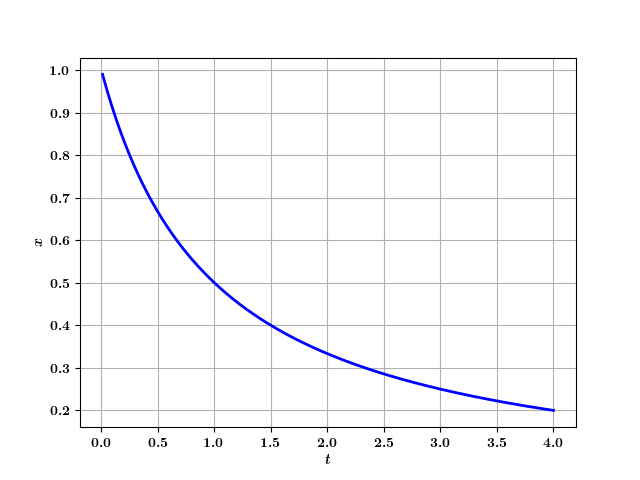

In [84]:
# ----------------------------------------------
# --- Solve d x / d t = - x**2 ---
# ----------------------------------------------
from scipy.integrate import RK45
mix.reload_module(mix)

t_end = 4
min_dt = 0.01
max_dt = 0.02
Nt_max = int(t_end/min_dt)
x0 = np.array([1,2])

yy = lambda t,x: -x**2

oo = RK45(yy, 0, x0, t_end, first_step=min_dt, max_step=max_dt)

res_x   = np.array([None]*Nt_max,dtype=float)
t_array = np.array([None]*Nt_max,dtype=float)
Nt_act = 0
while mix.compare_two_strings(oo.status, "running"):
    oo.step()
    res_x[Nt_act]   = float(oo.y[0])
    t_array[Nt_act] = float(oo.t)
    # print("res = ", res_x[Nt_act], " at t = {:0.3f}".format(t_array[Nt_act]))
    Nt_act += 1
res_x   = res_x[:Nt_act]
t_array = t_array[:Nt_act]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t_array, res_x, color='b', linewidth = 2, linestyle='-')
plt.xlabel('$t$')
plt.ylabel("$x$")
# ax.legend()
plt.grid(True)
plt.show()

In [25]:
from scipy.integrate import RK45
mix.reload_module(mix)

t_end = 2
x0 = np.array([1,2])

yy = lambda t,x: -x**2

oo = RK45(yy, 0, x0, t_end, first_step=0.01)

while mix.compare_two_strings(oo.status, "running"):
    oo.step()
    print("res = ", oo.y, " at t = {:0.3f}".format(oo.t))

res =  [0.99  1.961]  at t = 0.010
res =  [0.901 1.639]  at t = 0.110
res =  [0.693 1.063]  at t = 0.444
res =  [0.533 0.728]  at t = 0.877
res =  [0.395 0.493]  at t = 1.533
res =  [0.333 0.401]  at t = 2.000


In [30]:
8//3

2